# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [55]:
import pandas as pd
url = "healthcare_dataset.csv"
df = pd.read_csv(url)
df.head()

Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Emergency   
2           Medicare    36874.896997          292      Emergency   
3           Medicare    23303.322092          480         Urgent   
4   UnitedHealthcare    18086.344184          477         Urgent   

  Discharge Date   Medication  Test Results  
0     2022-12-01      Aspirin  Inconclusive  
1     2023-06-15      Lipitor        Normal  
2     2019-02-08      Lipitor        Normal  
3     2020-05-03   Penicillin      Abnormal  
4     2021-08-02  Paracetamol        Normal

# Data Cleaning & Data Transformation

In [56]:
#checking missing values
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [57]:
#checking duplicates values
df.duplicated().sum()

0

In [58]:
#checking data types (columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [59]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

In [61]:
#drop column "Name" since it's not important
df = df.drop(columns=['Name'])
df.head()

Age  Gender Blood Type Medical Condition Date of Admission          Doctor  \
0   81  Female         O-          Diabetes        2022-11-17  Patrick Parker   
1   35    Male         O+            Asthma        2023-06-01   Diane Jackson   
2   61    Male         B-           Obesity        2019-01-09      Paul Baker   
3   49    Male         B-            Asthma        2020-05-02  Brian Chandler   
4   51    Male         O-         Arthritis        2021-07-09  Dustin Griffin   

                    Hospital Insurance Provider  Billing Amount  Room Number  \
0           Wallace-Hamilton           Medicare    37490.983364          146   
1  Burke, Griffin and Cooper   UnitedHealthcare    47304.064845          404   
2                 Walton LLC           Medicare    36874.896997          292   
3                 Garcia Ltd           Medicare    23303.322092          480   
4    Jones, Brown and Murray   UnitedHealthcare    18086.344184          477   

  Admission Type Discharge Date   Medication  Test Results  
0       Elective     2022-12-01      Aspirin  Inconclusive  
1      Emergency     2023-06-15      Lipitor        Normal  
2      Emergency     2019-02-08      Lipitor        Normal  
3         Urgent     2020-05-03   Penicillin      Abnormal  
4         Urgent     2021-08-02  Paracetamol        Normal

In [62]:
#since i want to predict the billing, i will now categorize the billing amount into classes (high and low)
import numpy as np

threshold = 30000

df['Billing Category'] = np.where(df['Billing Amount'] > threshold, "High", "Low")

# Drop the original 'Billing Amount'
df = df.drop(columns=['Billing Amount'])
df.head()

Age  Gender Blood Type Medical Condition Date of Admission          Doctor  \
0   81  Female         O-          Diabetes        2022-11-17  Patrick Parker   
1   35    Male         O+            Asthma        2023-06-01   Diane Jackson   
2   61    Male         B-           Obesity        2019-01-09      Paul Baker   
3   49    Male         B-            Asthma        2020-05-02  Brian Chandler   
4   51    Male         O-         Arthritis        2021-07-09  Dustin Griffin   

                    Hospital Insurance Provider  Room Number Admission Type  \
0           Wallace-Hamilton           Medicare          146       Elective   
1  Burke, Griffin and Cooper   UnitedHealthcare          404      Emergency   
2                 Walton LLC           Medicare          292      Emergency   
3                 Garcia Ltd           Medicare          480         Urgent   
4    Jones, Brown and Murray   UnitedHealthcare          477         Urgent   

  Discharge Date   Medication  Test Results Billing Category  
0     2022-12-01      Aspirin  Inconclusive             High  
1     2023-06-15      Lipitor        Normal             High  
2     2019-02-08      Lipitor        Normal             High  
3     2020-05-03   Penicillin      Abnormal              Low  
4     2021-08-02  Paracetamol        Normal              Low

In [63]:
#encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

Age  Gender  Blood Type  Medical Condition Date of Admission  Doctor  \
0   81       0           7                  3        2022-11-17    7167   
1   35       1           6                  1        2023-06-01    2597   
2   61       1           5                  5        2019-01-09    7180   
3   49       1           5                  1        2020-05-02    1169   
4   51       1           7                  0        2021-07-09    2775   

   Hospital  Insurance Provider  Room Number  Admission Type Discharge Date  \
0      7960                   3          146               0     2022-12-01   
1       978                   4          404               1     2023-06-15   
2      7996                   3          292               1     2019-02-08   
3      2482                   3          480               2     2020-05-03   
4      3908                   4          477               2     2021-08-02   

   Medication  Test Results  Billing Category  
0           0             1                 0  
1           2             2                 0  
2           2             2                 0  
3           4             0                 1  
4           3             2                 1

In [64]:
#Feature engineering
df['Hospital Stay Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df = df.drop(columns=['Date of Admission', 'Discharge Date'])
df.head()

Age  Gender  Blood Type  Medical Condition  Doctor  Hospital  \
0   81       0           7                  3    7167      7960   
1   35       1           6                  1    2597       978   
2   61       1           5                  5    7180      7996   
3   49       1           5                  1    1169      2482   
4   51       1           7                  0    2775      3908   

   Insurance Provider  Room Number  Admission Type  Medication  Test Results  \
0                   3          146               0           0             1   
1                   4          404               1           2             2   
2                   3          292               1           2             2   
3                   3          480               2           4             0   
4                   4          477               2           3             2   

   Billing Category  Hospital Stay Duration  
0                 0                      14  
1                 0                      14  
2                 0                      30  
3                 1                       1  
4                 1                      24

# Visualization (EDA)

Univariate

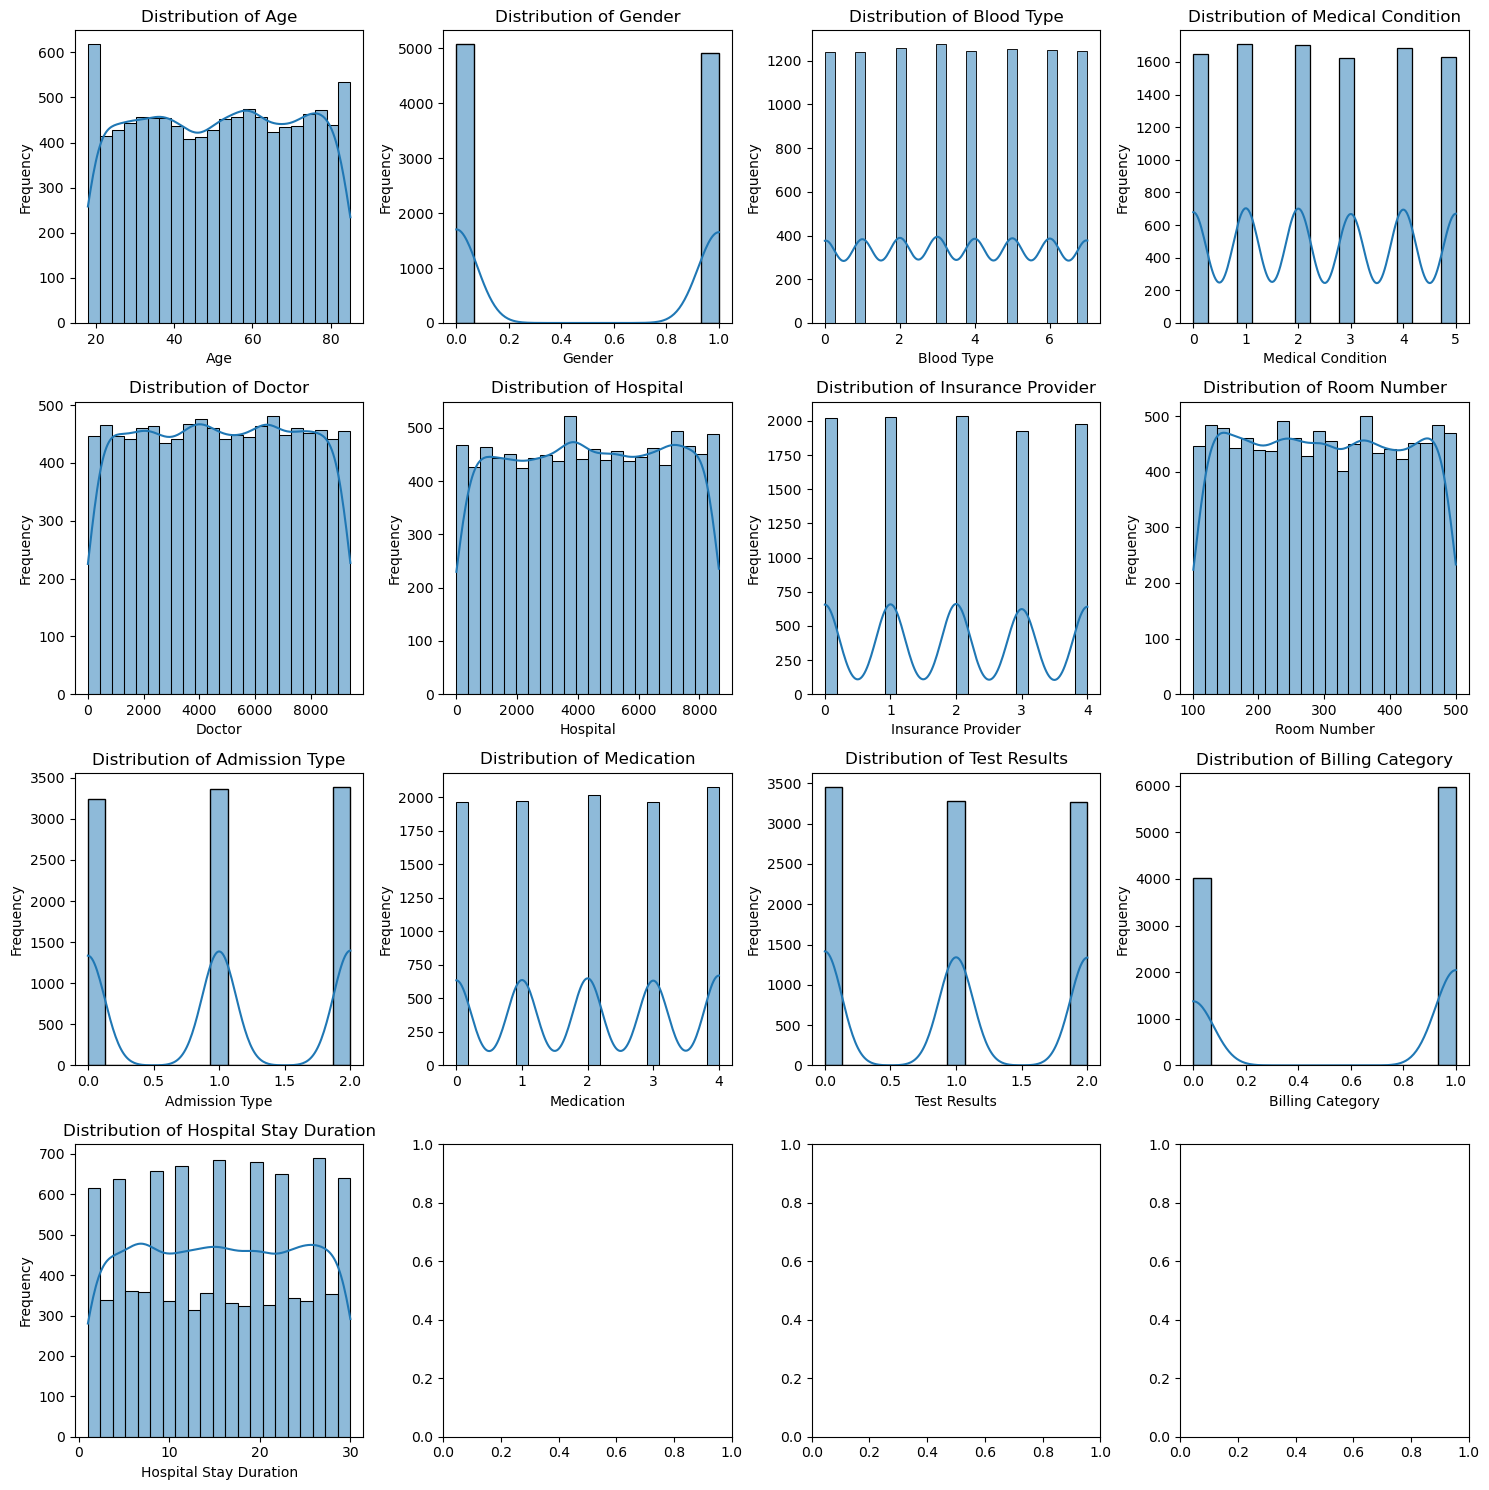

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.flatten()

sns.histplot(data=df, x="Age", kde=True, ax=axes[0])
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df, x="Gender", kde=True, ax=axes[1])
axes[1].set_title("Distribution of Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Frequency")

sns.histplot(data=df, x="Blood Type", kde=True, ax=axes[2])
axes[2].set_title("Distribution of Blood Type")
axes[2].set_xlabel("Blood Type")
axes[2].set_ylabel("Frequency")

sns.histplot(data=df, x="Medical Condition", kde=True, ax=axes[3])
axes[3].set_title("Distribution of Medical Condition")
axes[3].set_xlabel("Medical Condition")
axes[3].set_ylabel("Frequency")

sns.histplot(data=df, x="Doctor", kde=True, ax=axes[4])
axes[4].set_title("Distribution of Doctor")
axes[4].set_xlabel("Doctor")
axes[4].set_ylabel("Frequency")

sns.histplot(data=df, x="Hospital", kde=True, ax=axes[5])
axes[5].set_title("Distribution of Hospital")
axes[5].set_xlabel("Hospital")
axes[5].set_ylabel("Frequency")

sns.histplot(data=df, x="Insurance Provider", kde=True, ax=axes[6])
axes[6].set_title("Distribution of Insurance Provider")
axes[6].set_xlabel("Insurance Provider")
axes[6].set_ylabel("Frequency")

sns.histplot(data=df, x="Room Number", kde=True, ax=axes[7])
axes[7].set_title("Distribution of Room Number")
axes[7].set_xlabel("Room Number")
axes[7].set_ylabel("Frequency")

sns.histplot(data=df, x="Admission Type", kde=True, ax=axes[8])
axes[8].set_title("Distribution of Admission Type")
axes[8].set_xlabel("Admission Type")
axes[8].set_ylabel("Frequency")

sns.histplot(data=df, x="Medication", kde=True, ax=axes[9])
axes[9].set_title("Distribution of Medication")
axes[9].set_xlabel("Medication")
axes[9].set_ylabel("Frequency")

sns.histplot(data=df, x="Test Results", kde=True, ax=axes[10])
axes[10].set_title("Distribution of Test Results")
axes[10].set_xlabel("Test Results")
axes[10].set_ylabel("Frequency")

sns.histplot(data=df, x="Hospital Stay Duration", kde=True, ax=axes[12])
axes[12].set_title("Distribution of Hospital Stay Duration")
axes[12].set_ylabel("Frequency")

sns.histplot(data=df, x="Billing Category", kde=True, ax=axes[11])
axes[11].set_title("Distribution of Billing Category")
axes[11].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

Category 1: 5978
Category 0: 4022


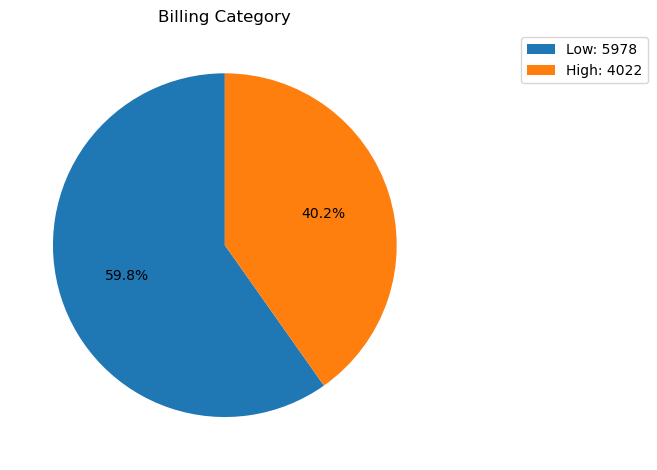

In [66]:
import matplotlib.pyplot as plt

# Pie chart
df['Billing Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=None)
plt.title('Billing Category')
plt.ylabel('')

category_counts = df['Billing Category'].value_counts()
category_labels = {0: 'High', 1: 'Low', 2: 'Medium'}

for category, count in category_counts.items():
    print(f'Category {category}: {count}')

custom_labels = [f"{label}: {count}" for category, count in category_counts.items() for label in [category_labels.get(category)]]

plt.legend(custom_labels, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.tight_layout()
plt.show()


Multivariate

In [67]:
df.corr()

Age    Gender  Blood Type  Medical Condition  \
Age                     1.000000 -0.008099   -0.006807          -0.003616   
Gender                 -0.008099  1.000000    0.012607          -0.003872   
Blood Type             -0.006807  0.012607    1.000000          -0.005318   
Medical Condition      -0.003616 -0.003872   -0.005318           1.000000   
Doctor                  0.016265  0.017136    0.005417           0.011276   
Hospital               -0.007291 -0.000941    0.012167           0.004974   
Insurance Provider     -0.000138 -0.020669    0.025533           0.007111   
Room Number            -0.005371  0.002864    0.000811          -0.008479   
Admission Type          0.003233 -0.004515   -0.005247           0.019222   
Medication              0.010242  0.007129   -0.002690          -0.003538   
Test Results            0.008747 -0.010472   -0.003698           0.001659   
Billing Category        0.018009 -0.002515    0.006104          -0.010459   
Hospital Stay Duration  0.009111 -0.006361    0.005942          -0.016266   

                          Doctor  Hospital  Insurance Provider  Room Number  \
Age                     0.016265 -0.007291           -0.000138    -0.005371   
Gender                  0.017136 -0.000941           -0.020669     0.002864   
Blood Type              0.005417  0.012167            0.025533     0.000811   
Medical Condition       0.011276  0.004974            0.007111    -0.008479   
Doctor                  1.000000  0.022142           -0.022885     0.002463   
Hospital                0.022142  1.000000            0.015020     0.012619   
Insurance Provider     -0.022885  0.015020            1.000000    -0.008427   
Room Number             0.002463  0.012619           -0.008427     1.000000   
Admission Type          0.005842 -0.021674            0.012776    -0.004711   
Medication             -0.001012  0.006021            0.007692    -0.003463   
Test Results            0.003527 -0.000391           -0.010429     0.007004   
Billing Category        0.014200 -0.006471            0.014889     0.008469   
Hospital Stay Duration -0.020551  0.002414           -0.005630     0.009610   

                        Admission Type  Medication  Test Results  \
Age                           0.003233    0.010242      0.008747   
Gender                       -0.004515    0.007129     -0.010472   
Blood Type                   -0.005247   -0.002690     -0.003698   
Medical Condition             0.019222   -0.003538      0.001659   
Doctor                        0.005842   -0.001012      0.003527   
Hospital                     -0.021674    0.006021     -0.000391   
Insurance Provider            0.012776    0.007692     -0.010429   
Room Number                  -0.004711   -0.003463      0.007004   
Admission Type                1.000000   -0.007887     -0.010964   
Medication                   -0.007887    1.000000     -0.013938   
Test Results                 -0.010964   -0.013938      1.000000   
Billing Category              0.009499    0.020510      0.009201   
Hospital Stay Duration       -0.005942    0.009022     -0.008228   

                        Billing Category  Hospital Stay Duration  
Age                             0.018009                0.009111  
Gender                         -0.002515               -0.006361  
Blood Type                      0.006104                0.005942  
Medical Condition              -0.010459               -0.016266  
Doctor                          0.014200               -0.020551  
Hospital                       -0.006471                0.002414  
Insurance Provider              0.014889               -0.005630  
Room Number                     0.008469                0.009610  
Admission Type                  0.009499               -0.005942  
Medication                      0.020510                0.009022  
Test Results                    0.009201               -0.008228  
Billing Category                1.000000                0.002737  
Hospital Stay Durat

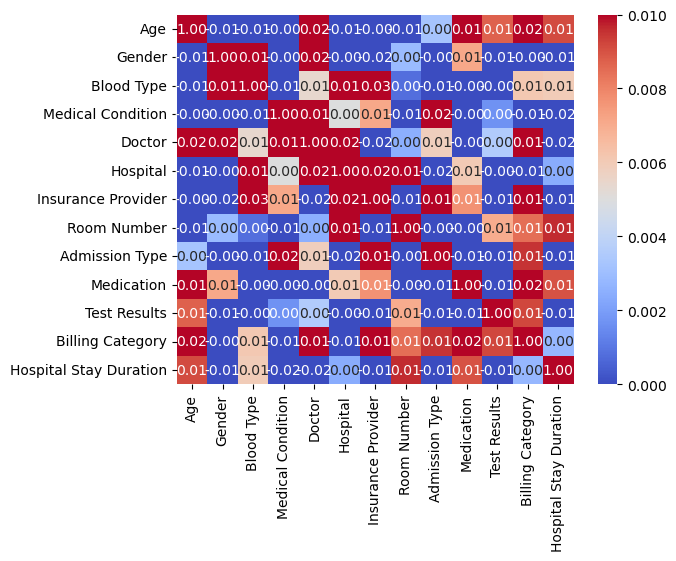

In [68]:
sns.heatmap(df.corr(), vmin=0, vmax=0.01, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

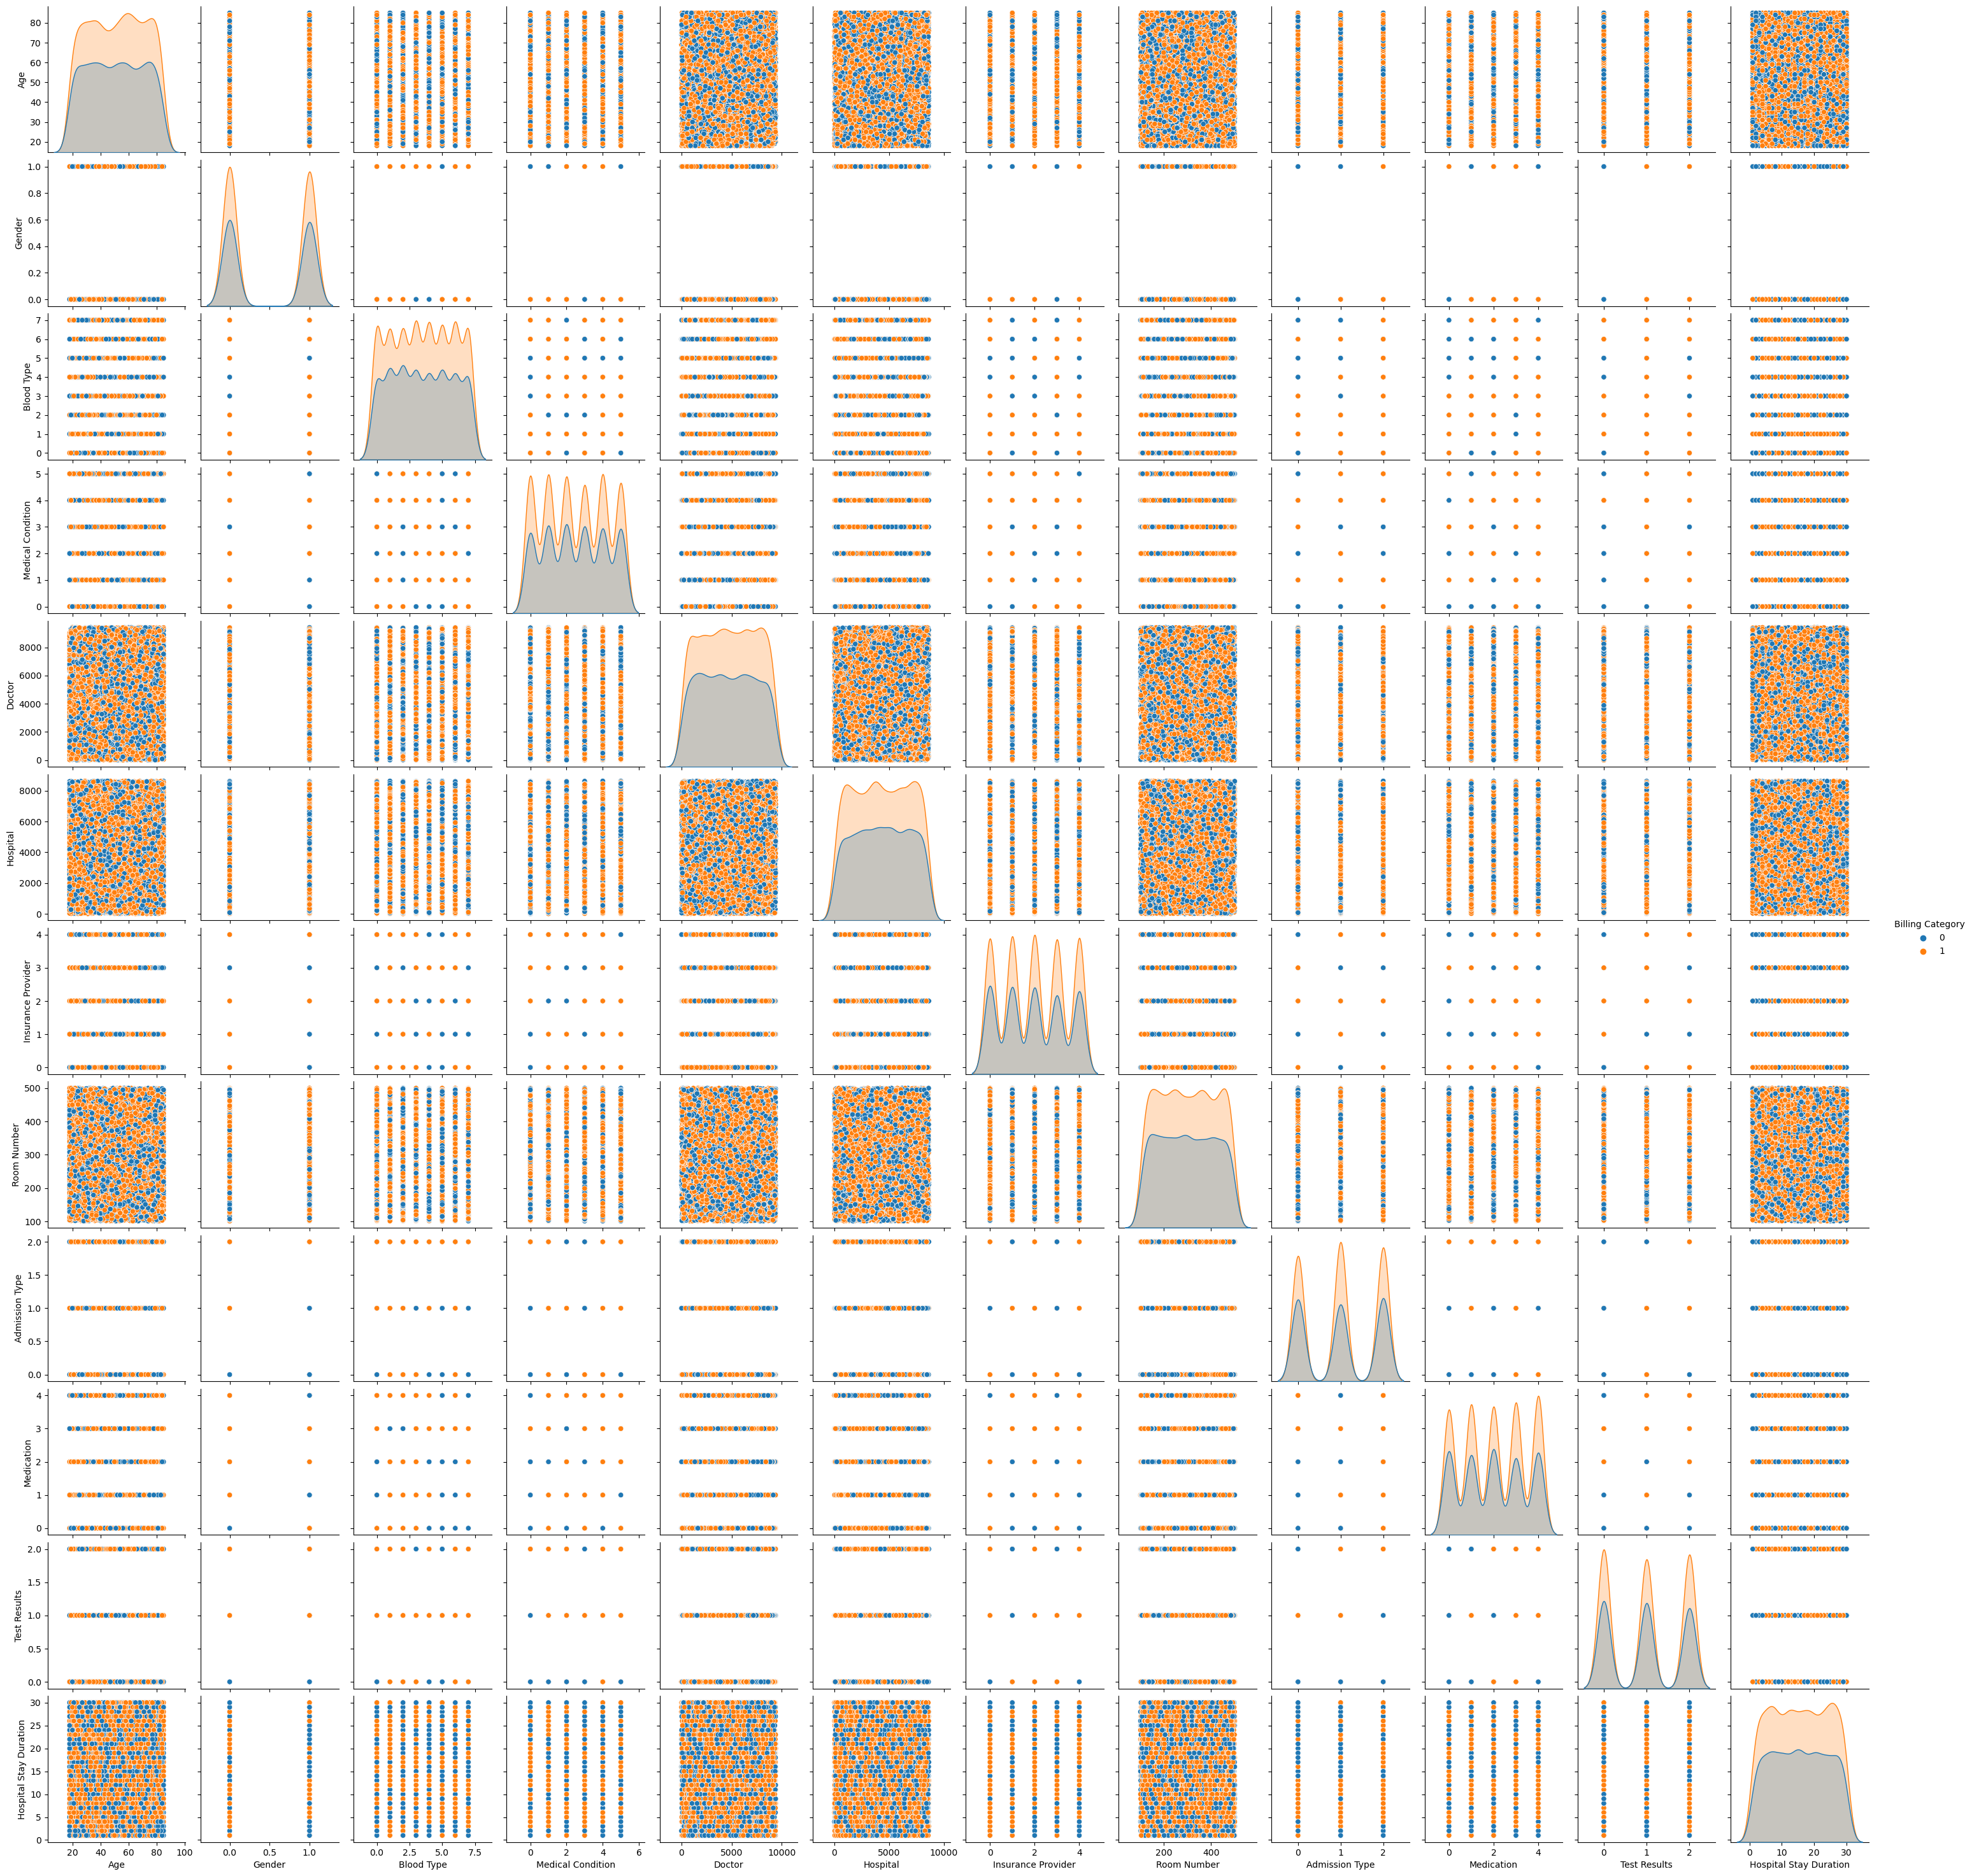

In [69]:
sns.pairplot(df, hue='Billing Category')

# Classification using Logistic Regression

In [70]:
#splitting the data 
y = df['Billing Category'] #target variable
X = df.drop('Billing Category', axis=1) #predictor variables
print(y.head())
print(X.head())

0    0
1    0
2    0
3    1
4    1
Name: Billing Category, dtype: int64
   Age  Gender  Blood Type  Medical Condition  Doctor  Hospital  \
0   81       0           7                  3    7167      7960   
1   35       1           6                  1    2597       978   
2   61       1           5                  5    7180      7996   
3   49       1           5                  1    1169      2482   
4   51       1           7                  0    2775      3908   

   Insurance Provider  Room Number  Admission Type  Medication  Test Results  \
0                   3          146               0           0             1   
1                   4          404               1           2             2   
2                   3          292               1           2             2   
3                   3          480               2           4             0   
4                   4          477               2           3             2   

   Hospital Stay Duration  
0               

In [71]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler_transformed = scaler.transform(X)
scaler_transformed

array([[ 1.50846482, -0.98511083,  1.53060631, ..., -1.42459457,
         0.02305662, -0.18135987],
       [-0.83991244,  1.01511421,  1.09315274, ..., -0.01466329,
         1.24298364, -0.18135987],
       [ 0.48743123,  1.01511421,  0.65569916, ..., -0.01466329,
         1.24298364,  1.67659758],
       ...,
       [ 0.13006947,  1.01511421,  0.65569916, ..., -0.71962893,
         1.24298364, -0.18135987],
       [ 1.66161985,  1.01511421, -1.53156871, ...,  1.39526799,
         1.24298364,  0.51537417],
       [-1.60568763,  1.01511421,  0.65569916, ...,  1.39526799,
        -1.1968704 ,  0.97986354]])

In [72]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaler_transformed,y,test_size=0.2,random_state=42)

In [73]:
#classification model from data training
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [74]:
#evaluation
y_pred = classifier.predict(X_test)
evaluate = pd.DataFrame({'y_test':y_test, 'y_pred': y_pred})
evaluate.head()

y_test  y_pred
6252       0       1
4684       1       1
1731       1       1
4742       0       1
4521       1       1

In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[   0,  841],
       [   0, 1159]])

<Axes: >

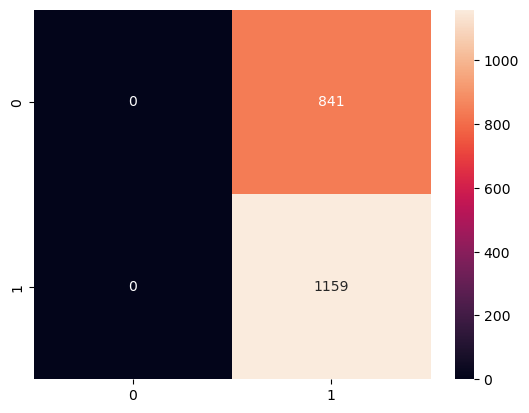

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pred), vmin=0, annot=True, fmt="d")

In [77]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))
print("Accuracy score using Logistic regression: ", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       841
           1       0.58      1.00      0.73      1159

    accuracy                           0.58      2000
   macro avg       0.29      0.50      0.37      2000
weighted avg       0.34      0.58      0.43      2000

Accuracy score using Logistic regression:  0.5795


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification using KNN

In [78]:
#classification model from data training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [79]:
y_pred = knn.predict(X_test)
comparison_table = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
comparison_table.head()

y_test  y_pred
6252       0       0
4684       1       1
1731       1       1
4742       0       1
4521       1       0

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[269, 572],
       [346, 813]])

<Axes: >

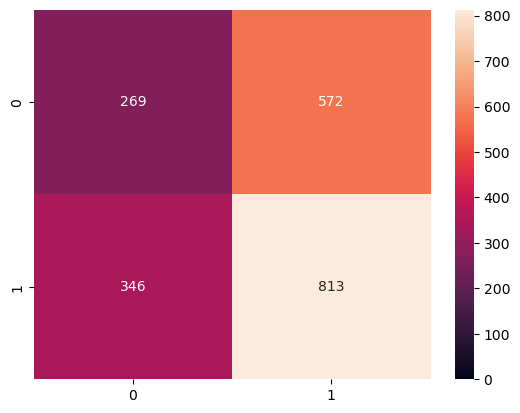

In [81]:
sns.heatmap(confusion_matrix(y_test,y_pred), vmin=0, annot=True, fmt="d")

In [82]:
print("Accuracy score KNN: ", accuracy_score(y_test,y_pred))

Accuracy score KNN:  0.541
